In [1]:
from Proyecto_Final_Redes import *
from train_test_split import *

import cv2
from  scipy.sparse import csr_matrix
from matplotlib import pyplot as plt



In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

2022-05-26 13:19:34.215687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dave/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-05-26 13:19:34.215708: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Importación de los datos

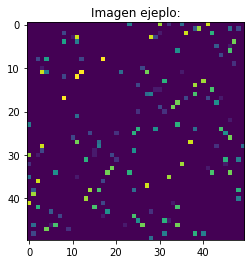

(7763, 52, 52, 1) (7763, 52, 52, 1)
(1941, 52, 52, 1) (1941, 52, 52, 1)


In [3]:
# Train test split
(train_in, train_out), (test_in, test_out) = train_test_split(train = 0.8, test = 0.2)

train_in = train_in[..., tf.newaxis].astype('float32')
test_in = test_in[..., tf.newaxis].astype('float32')

train_out = train_out[..., tf.newaxis].astype('float32')
test_out = test_out[..., tf.newaxis].astype('float32')

print(train_in.shape, train_out.shape)
print(test_in.shape, test_out.shape)

# Creamos nuestro modelo autoencoder para eliminación de ruido

In [4]:
def m1():
    input = layers.Input(shape=(52, 52, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)

    # Decoder
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

    # Autoencoder
    autoencoder = Model(input, x)
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
    autoencoder.summary()
    
    return autoencoder

In [14]:
def m2():
    input = layers.Input(shape=(52, 52, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)    
    x = layers.MaxPooling2D((2, 2), padding="same")(x)
    
    # Decoder
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

    # Autoencoder
    autoencoder = Model(input, x)
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
    autoencoder.summary()
    
    return autoencoder

In [15]:
autoencoder = m2()
        

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 52, 52, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        9248      
                                                           

In [16]:
epochs = 50

history = autoencoder.fit(
                            x = train_in,
                            y = train_out,
                            epochs = epochs,
                            batch_size = 128,
                            shuffle = True,
                            validation_data = (test_in, test_out),
                        )


Epoch 1/50
61/61 [==============================] - 38s 625ms/step - loss: 0.4152 - val_loss: 0.3728
Epoch 2/50
61/61 [==============================] - 39s 639ms/step - loss: 0.3329 - val_loss: 0.3386
Epoch 3/50
61/61 [==============================] - 40s 657ms/step - loss: 0.3146 - val_loss: 0.3176
Epoch 4/50
61/61 [==============================] - 39s 645ms/step - loss: 0.3069 - val_loss: 0.3137
Epoch 5/50
61/61 [==============================] - 38s 627ms/step - loss: 0.3018 - val_loss: 0.3086
Epoch 6/50
61/61 [==============================] - 38s 625ms/step - loss: 0.2968 - val_loss: 0.3056
Epoch 7/50
61/61 [==============================] - 38s 631ms/step - loss: 0.2908 - val_loss: 0.2968
Epoch 8/50
61/61 [==============================] - 39s 640ms/step - loss: 0.2824 - val_loss: 0.2934
Epoch 9/50
61/61 [==============================] - 40s 651ms/step - loss: 0.2732 - val_loss: 0.2881
Epoch 10/50
61/61 [==============================] - 40s 651ms/step - loss: 0.2718 - val_lo

Preparamos nuestra función para poder visualizar el output [tomado de aqui](https://keras.io/examples/vision/autoencoder/): 

In [17]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(52, 52))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(52, 52))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Vemos los resultados

En la fila superior están los datos de entrada, y en la fila inferior los datos que arrojó la red como output.

61/61 [==============================] - 1s 21ms/step


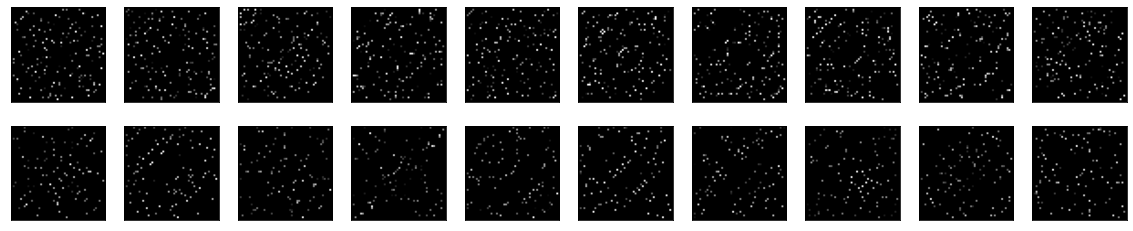

In [18]:
predictions = autoencoder.predict(test_in)
display(test_in, test_out)

***Para evaluar mejor el rendimiento de nuestro modelo vamos a revisar su historia***

In [19]:
def plot(h, epochs):

    LOSS = 0
    ACCURACY = 1
    EPOCHS = epochs

    training = np.zeros((2, EPOCHS))
    testing  = np.zeros((2, EPOCHS))

    print(h.history.keys())
    print(h.history["loss"])

    training[LOSS] = h.history['loss']
    testing[LOSS]  = h.history['val_loss']


    epochs = range(1, EPOCHS + 1)
    fig, axs = plt.subplots(1, 2, figsize = (17,5))

    for i, label in zip((LOSS, ), ('loss',)):
        axs[i].plot(epochs, training[i], 'b-', label='Training ' + label)
        axs[i].plot(epochs, testing[i], 'y-', label='Testing ' + label)
        axs[i].set_title('Training and test ' + label)
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel(label)
        axs[i].legend()

    plt.show()

dict_keys(['loss', 'val_loss'])
[0.4151713252067566, 0.33294910192489624, 0.31458309292793274, 0.3068787455558777, 0.3017750084400177, 0.2968357503414154, 0.2907925844192505, 0.28237995505332947, 0.27319326996803284, 0.2717822194099426, 0.2681041657924652, 0.26352548599243164, 0.26484477519989014, 0.26090630888938904, 0.25855910778045654, 0.2564135789871216, 0.25362345576286316, 0.2513516843318939, 0.25222358107566833, 0.2450145184993744, 0.23985648155212402, 0.23683224618434906, 0.23726843297481537, 0.22448530793190002, 0.21900369226932526, 0.21217080950737, 0.2013956904411316, 0.19310341775417328, 0.18229959905147552, 0.16304467618465424, 0.13150647282600403, 0.07897671312093735, -0.0786646381020546, -0.6085985898971558, -2.5355639457702637, -13.92345905303955, -117.4859848022461, -476.8519287109375, -1933.336669921875, -6566.7890625, -19548.046875, -52014.890625, -116935.4921875, -249623.265625, -485493.90625, -867199.75, -1426259.625, -2357089.5, -3695803.25, -5583760.5]


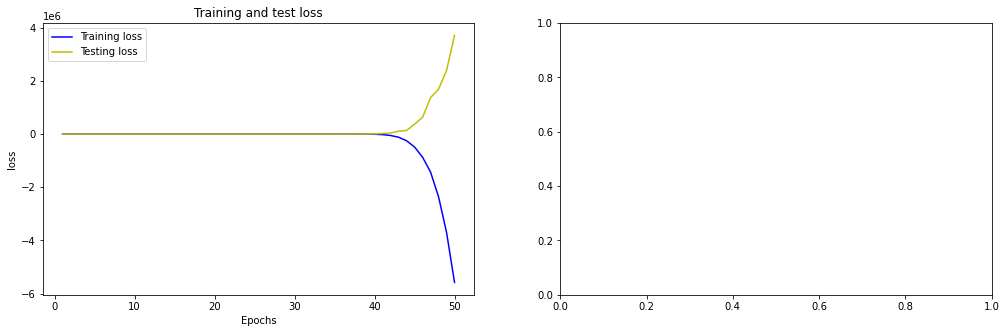

In [20]:
plot(history, epochs)

# Guardamos nuestro modelo

In [21]:
from os import path, mkdir, getcwd

# busca la ruta actual para crear el directorio en caso
# de que no exista
cwd = getcwd()
models_dir = cwd + '/models'

if not path.exists(models_dir):
    mkdir(models_dir)

In [22]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d_%m_%Y__%H_%M_%S")
autoencoder.save('./models/modelo_' + dt_string + '.h5')